In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv("Online Shop Customer Sales Data.csv")

In [4]:
data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [5]:
data.shape

(65796, 12)

In [6]:
data.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [7]:
data.columns

Index(['Customer_id', 'Age', 'Gender', 'Revenue_Total', 'N_Purchases',
       'Purchase_DATE', 'Purchase_VALUE', 'Pay_Method', 'Time_Spent',
       'Browser', 'Newsletter', 'Voucher'],
      dtype='object')

In [8]:
target="N_Purchases"

In [9]:
data[target].value_counts()

N_Purchases
1    9519
2    9427
3    9426
7    9418
5    9408
6    9340
4    9258
Name: count, dtype: int64

In [10]:
data.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [11]:
data.fillna(data.mean(numeric_only=True),inplace=True)

In [12]:
data.select_dtypes(include='object').columns

Index(['Purchase_DATE'], dtype='object')

In [13]:
data=data.drop(['Customer_id','Purchase_DATE'],axis=1,errors='ignore')

In [14]:
data=pd.get_dummies(data,drop_first=True)

In [15]:
X=data.drop('N_Purchases', axis=1)
y=data['N_Purchases']

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X=X.loc[:,X.nunique() > 1]

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
X_scaled[:5]

array([[ 0.9697616 , -1.42924116,  1.17570218,  0.67625438, -0.28527272,
         1.0296686 , -0.6332152 , -0.42177523, -0.57774806],
       [-1.56181783,  0.69967198,  0.56667102, -0.98817042,  0.63898393,
         0.20542808, -0.6332152 , -0.42177523,  1.73085825],
       [ 0.89743076,  0.69967198, -1.1466474 , -0.40582206, -1.20952938,
         0.58335496, -0.6332152 ,  2.3709311 , -0.57774806],
       [-0.76617858, -1.42924116,  1.76465539,  2.0644719 , -0.28527272,
         1.10525398, -0.6332152 ,  2.3709311 , -0.57774806],
       [-1.34482531,  0.69967198,  1.95204959,  3.09401301, -0.28527272,
         0.0218636 , -0.6332152 ,  2.3709311 , -0.57774806]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

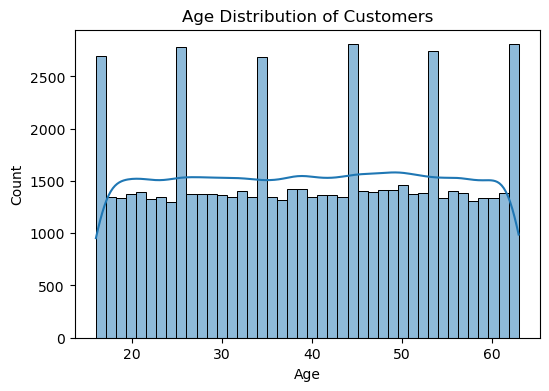

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

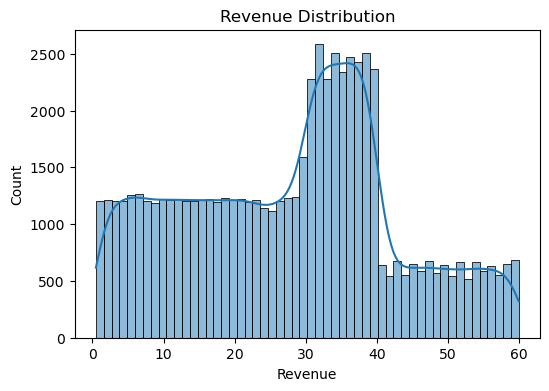

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(data['Revenue_Total'], kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

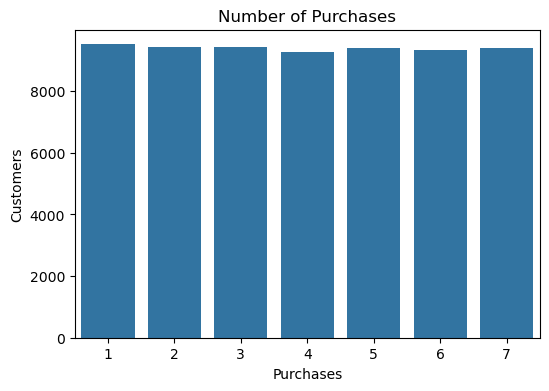

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['N_Purchases'])
plt.title('Number of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Customers')
plt.show()

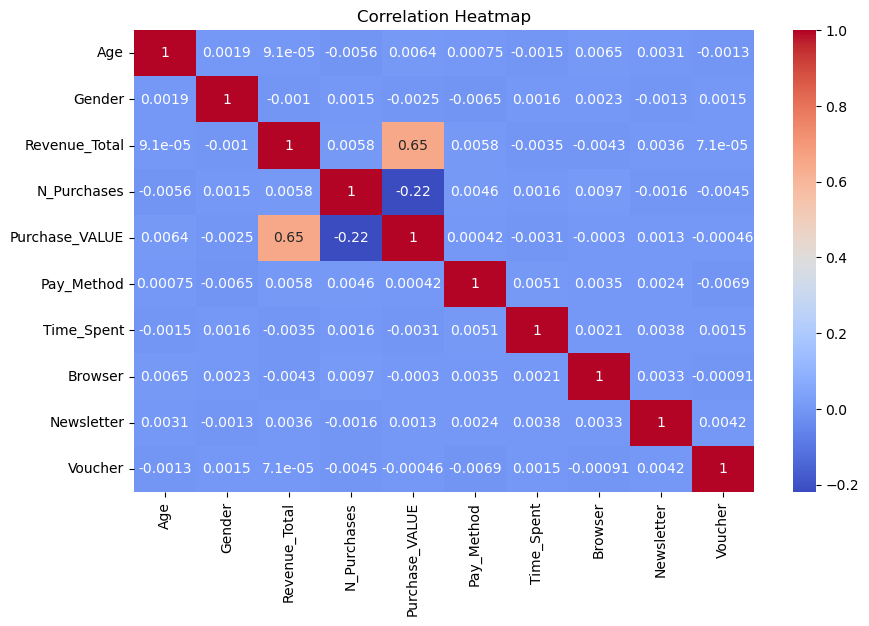

In [27]:
plt.figure(figsize=(10,6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

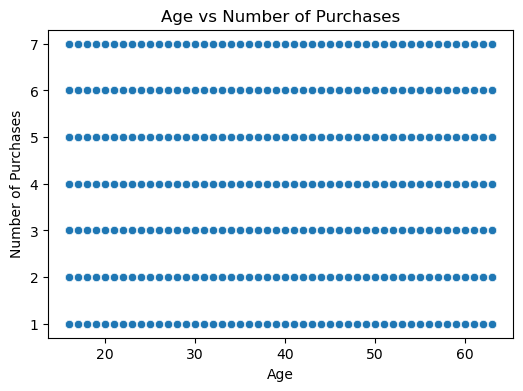

In [57]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Age'], y=data['N_Purchases'])
plt.title('Age vs Number of Purchases')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()

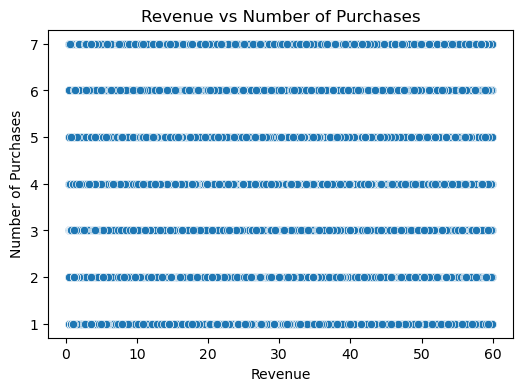

In [59]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Revenue_Total'], y=data['N_Purchases'])
plt.title('Revenue vs Number of Purchases')
plt.xlabel('Revenue')
plt.ylabel('Number of Purchases')
plt.show()

In [61]:
X_scaled.shape
y.shape

(65796,)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred_lr=lr.predict(X_test)

In [71]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred_dt=dt.predict(X_test)

In [75]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred_rf=rf.predict(X_test)

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred_knn=knn.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [85]:
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Evaluation
Accuracy: 0.2743920972644377
Precision: 0.23835225062266288
Recall: 0.2743920972644377
F1 Score: 0.24676993631115304
Confusion Matrix:
 [[1890    0    0    0    0    0    0]
 [ 172  214  345  163  497  164  312]
 [ 140  231  325  186  508  158  332]
 [ 150  224  331  183  497  157  340]
 [ 137  234  321  204  518  166  300]
 [ 157  244  328  228  472  167  315]
 [ 145  213  324  208  489  157  314]]


In [87]:
print("\nDecision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Evaluation
Accuracy: 0.270516717325228
Precision: 0.2709399607645761
Recall: 0.270516717325228
F1 Score: 0.2707038820394445
Confusion Matrix:
 [[1711   34   30   31   25   28   31]
 [  34  324  305  313  283  283  325]
 [  33  313  296  296  327  318  297]
 [  26  292  316  302  325  310  311]
 [  20  312  311  313  314  280  330]
 [  30  303  321  311  341  306  299]
 [  29  323  308  301  293  289  307]]


In [89]:
print("\nRandom Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Evaluation
Accuracy: 0.2754559270516717
Precision: 0.24585466253846996
Recall: 0.2754559270516717
F1 Score: 0.25737590652614306
Confusion Matrix:
 [[1873    2    5    1    2    2    5]
 [ 130  304  304  297  279  261  292]
 [ 119  325  295  279  294  292  276]
 [ 113  334  302  285  275  268  305]
 [ 112  310  298  270  314  272  304]
 [ 120  314  319  299  320  274  265]
 [ 127  326  302  287  252  276  280]]


In [91]:
print("\nKNN Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Evaluation
Accuracy: 0.2169452887537994
Precision: 0.19198980046092212
Recall: 0.2169452887537994
F1 Score: 0.1967155254525198
Confusion Matrix:
 [[1282  139  100  105   90   81   93]
 [ 312  402  291  255  231  197  179]
 [ 322  401  322  250  213  193  179]
 [ 312  392  303  250  243  203  179]
 [ 321  382  305  246  220  211  195]
 [ 326  415  288  251  247  201  183]
 [ 329  406  274  234  233  196  178]]


In [93]:
import pandas as pd

model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
})

model_performance

,Model,Accuracy,F1 Score
0,Logistic Regression,0.274392,0.246770
1,Decision Tree,0.270517,0.270704
2,Random Forest,0.275456,0.257376
3,KNN,0.216945,0.196716


In [95]:
best_model = model_performance.loc[model_performance['Accuracy'].idxmax()]
best_model

Model       Random Forest
Accuracy         0.275456
F1 Score         0.257376
Name: 2, dtype: object